# Credit Card Fraud Detection

In [27]:
import tensorflow as tf
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [28]:
!nvidia-smi

Thu Oct  9 12:56:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             31W /   70W |     376MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [11]:
# Linear Algebra
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

# Imbalanced Classes
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# TensorFlow Keras
import keras
from keras import models
from keras import regularizers, Sequential, Input, layers
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Normalization
from tensorflow.keras.metrics import Recall, Precision

from sklearn import set_config;  set_config(display='diagram')

In [12]:
# Load data
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
X = df.drop(columns=['Class'], axis=1).values
y = df['Class'].values

df.shape

(284807, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## (1) Rebalancing classes

In [16]:
# Let's check class balance
pd.Series(y).value_counts(normalize=True)

,proportion
0,0.998273
1,0.001727


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_val.shape = {X_val.shape}")
print(f"y_val.shape = {y_val.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (139554, 30)
y_train.shape = (139554,)
X_val.shape = (59810, 30)
y_val.shape = (59810,)
X_test.shape = (85443, 30)
y_test.shape = (85443,)


In [18]:
print(np.sum(y_train[y_train == 1]))
print(np.sum(y_val[y_val == 1]))
print(np.sum(y_test[y_test == 1]))

print("-"*100)

print(f"There are {pd.Series(y_train).value_counts()[1]} fraudulent transactions in the train set")
print(f"There are {pd.Series(y_val).value_counts()[1]} fraudulent transactions in the val set")
print(f"There are {pd.Series(y_test).value_counts()[1]} fraudulent transactions in the test set")

241
103
148
----------------------------------------------------------------------------------------------------
There are 241 fraudulent transactions in the train set
There are 103 fraudulent transactions in the val set
There are 148 fraudulent transactions in the test set


In [19]:
# Sampling strategies
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.33)

In [20]:
# Pipeline the two strategies
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.33))])

In [21]:
# Rebalance the dataset
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print(f"X_train_resampled.shape = {X_train_resampled.shape}")
print(f"y_train_resampled.shape = {y_train_resampled.shape}")

X_train_resampled.shape = (56146, 30)
y_train_resampled.shape = (56146,)


In [22]:
# Reshuffle the resampled data just to be sure
stacked_resampled_data = np.hstack([X_train_resampled, y_train_resampled.reshape(-1,1)])
np.random.shuffle(stacked_resampled_data)

X_train_resampled = stacked_resampled_data[:,:30]
y_train_resampled = stacked_resampled_data[:,-1]

Text(0.5, 1.0, 'Y_train after balancing')

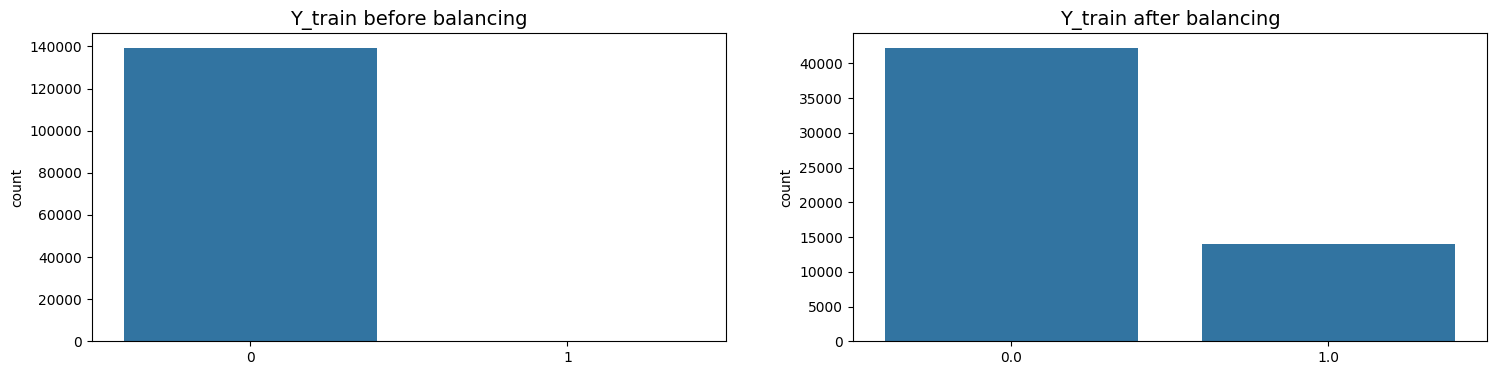

In [23]:
# plotting
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(1, 2, figsize=(18,4))

''' Before rebalancing classes'''

sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Y_train before balancing', fontsize=14)

''' After rebalancing classes'''

sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title('Y_train after balancing', fontsize=14)

In [24]:
print(X_train_resampled.shape)
print(X_val.shape)

(56146, 30)
(59810, 30)


## (2) Neural Network Iteration

In [46]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

In [47]:
normalizer = Normalization()
normalizer.adapt(X_train)

model = Sequential()
model.add(Input(shape=(X_train_resampled.shape[1],)))
model.add(normalizer)
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 30)             │            61 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 9)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 726 (2.84 KB)

 Trainable params: 665 (2.60 KB)

 Non-trainable params: 61 (248.00 B)

In [48]:
normalizer = Normalization()
normalizer.adapt(X_train)

model = Sequential()
model.add(Input(shape=(X_train_resampled.shape[1],)))
model.add(normalizer)
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500, batch_size=16, verbose=0
)

KeyboardInterrupt: 

In [ ]:
plot_loss_accuracy(history)

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True, monitor='val_accuracy')

reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

model = Sequential()
model.add(Input(shape=(X_train_resampled.shape[1],)))
model.add(normalizer)
model.add(layers.Dense(15, activation='relu', kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(9, activation='relu', kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(5, activation='relu', kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500, batch_size=16, verbose=0,
    callbacks=[es]
)

In [ ]:
plot_loss_accuracy(history)

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

## (2) Neural Network Iteration of The Course

In [29]:
metrics = [
    keras.metrics.Recall(name='recall'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
]

def init_model():
    input_shape = X_train_resampled.shape[1:]
    normalizer = Normalization()
    normalizer.adapt(X_train_resampled)

    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Model compilation
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics)
    return model

In [34]:
# Regularized model
model = init_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (56146, 30)            │            61 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (248.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 61 (248.00 B)

In [35]:
es = EarlyStopping(
    patience=10,
    monitor='val_recall', # We really want to detect fraudulent transactions!
    restore_best_weights=True)

history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64, # Large enough to get a decent chance of containing fraudulent transactions
                    callbacks=[es], shuffle=True)

Epoch 1/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.5829 - prc: 0.4675 - precision: 0.4116 - recall: 0.3864 - val_loss: 0.0957 - val_prc: 0.5449 - val_precision: 0.6033 - val_recall: 0.7087
Epoch 2/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2548 - prc: 0.9032 - precision: 0.9301 - recall: 0.6950 - val_loss: 0.0232 - val_prc: 0.5413 - val_precision: 0.5253 - val_recall: 0.8058
Epoch 3/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1725 - prc: 0.9515 - precision: 0.9678 - recall: 0.7939 - val_loss: 0.0181 - val_prc: 0.5425 - val_precision: 0.4375 - val_recall: 0.8155
Epoch 4/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1311 - prc: 0.9700 - precision: 0.9734 - recall: 0.8596 - val_loss: 0.0174 - val_prc: 0.5805 - val_precision: 0.3556 - val_recall: 0.8252
Epoch 5/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1226 - prc: 0.9719 - precision: 0.9677 - recall: 0.8955 - val_loss: 0.0170 - val_prc: 0.6025 - val_precision: 0.2848 - val_recall: 

In [36]:
def plot_loss_precision_recall_curve(history):

    fig, ax =plt.subplots(1, 3, figsize=(20,5))

    # --- LOSS

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x", linewidth=0.5)
    ax[0].grid(axis="y", linewidth=0.5)

    # --- RECALL

    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model recall', fontsize=18)
    ax[1].set_xlabel('Epoch', fontsize=14)
    ax[1].set_ylabel('Recall', fontsize=14)
    ax[1].legend(['Train', 'Val'], loc='lower right')
    ax[1].grid(axis="x", linewidth=0.5)
    ax[1].grid(axis="y", linewidth=0.5)


    # --- PRECISION


    ax[2].plot(history.history['precision'])
    ax[2].plot(history.history['val_precision'])
    ax[2].set_title('Model precision', fontsize=18)
    ax[2].set_xlabel('Epoch', fontsize=14)
    ax[2].set_ylabel('Precision', fontsize=14)
    ax[2].legend(['Train', 'Val'], loc='lower right')
    ax[2].grid(axis="x", linewidth=0.5)
    ax[2].grid(axis="y", linewidth=0.5)

    plt.show()

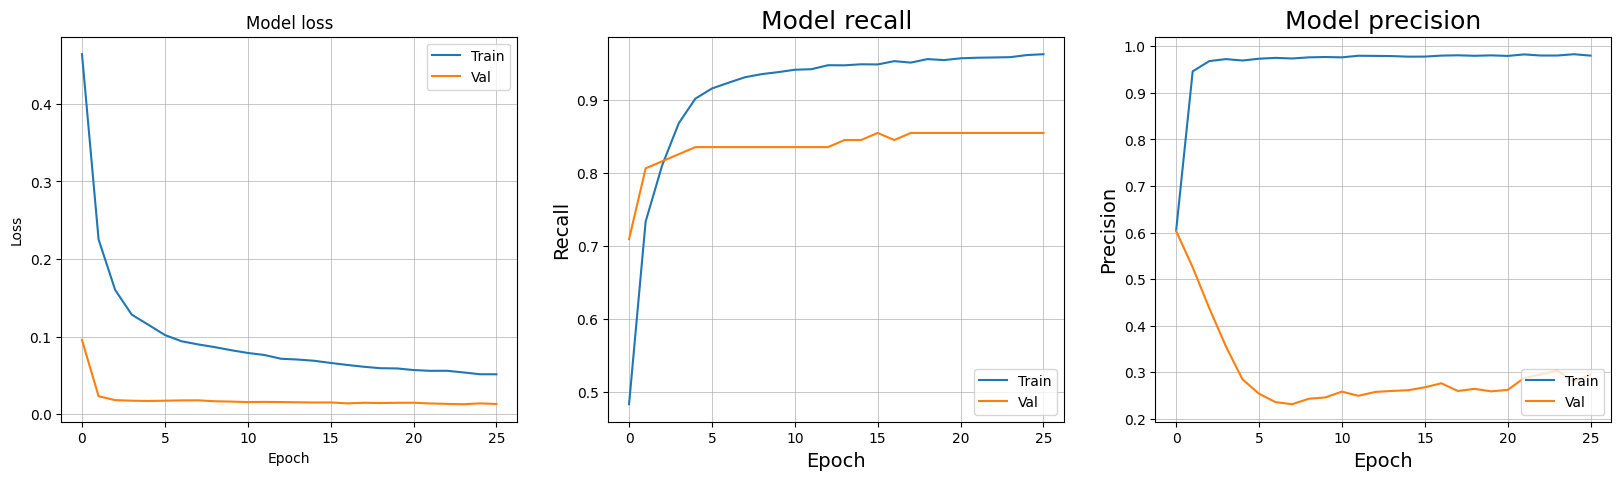

In [37]:
plot_loss_precision_recall_curve(history)

## (3) Score your model on the unseen Test set

In [38]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.01696912758052349,
 'prc': 0.7115259766578674,
 'precision': 0.2680850923061371,
 'recall': 0.8513513803482056}

In [39]:
y_pred_proba = model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [40]:
threshold = 0.50 # 50%

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
cm

array([[84951,   344],
       [   22,   126]])

Text(0.5, 25.722222222222214, 'Predicted label')

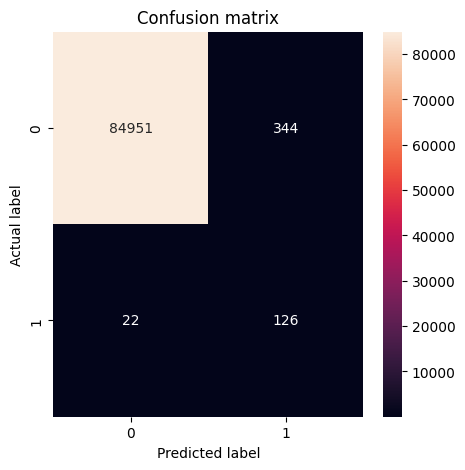

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.85      0.41       148

    accuracy                           1.00     85443
   macro avg       0.63      0.92      0.70     85443
weighted avg       1.00      1.00      1.00     85443



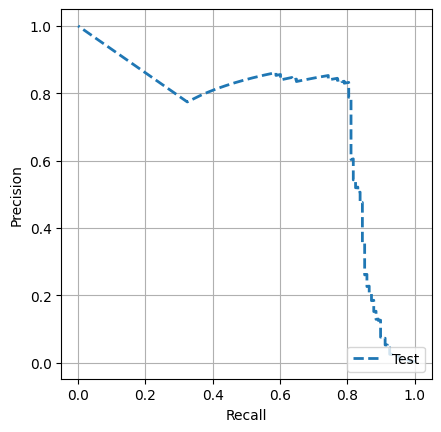

In [44]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')

In [45]:
precision =  0.67
recall = 0.75001